In [1]:
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.max()

255

In [4]:
single_image = x_train[0]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

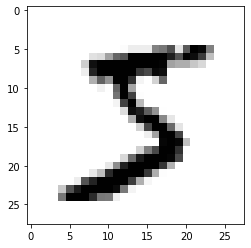

In [6]:
plt.imshow(single_image,cmap="gray_r")

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from keras.utils.np_utils import to_categorical

In [9]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [10]:
y_cat_train.max()

1.0

In [11]:
single_image.max()

255

In [12]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [13]:
single_image = x_train[0]

In [14]:
x_train.max()

1.0

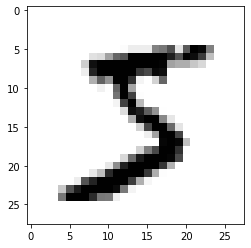

In [15]:
plt.imshow(single_image,cmap="gray_r")

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_train = x_train.reshape(60000,28,28,1)

In [18]:
x_train.shape

(60000, 28, 28, 1)

In [19]:
x_test = x_test.reshape(10000,28,28,1)

In [20]:
x_test.shape

(10000, 28, 28, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Flatten,Dense,MaxPool2D,Conv2D

In [22]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))
        
model.add(Flatten())
          
model.add(Dense(128,activation="relu"))
          
model.add(Dense(10,activation="softmax"))
          
model.compile(loss="categorical_crossentropy",
             optimizer="rmsprop",
             metrics=["accuracy"])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(x_train,y_cat_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2924 - accuracy: 0.9100
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0507 - accuracy: 0.9843
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0349 - accuracy: 0.9900
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0255 - accuracy: 0.9925
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0191 - accuracy: 0.9945
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0179 - accuracy: 0.9953
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0136 - accuracy: 0.9967
Epoch 8/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0121 - accuracy: 0.9970
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0092 - accuracy: 0.9977
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

In [25]:
model.metrics_names

['loss', 'accuracy']

In [26]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1122 - accuracy: 0.9853


[0.11224346607923508, 0.9853000044822693]

In [27]:
from sklearn.metrics import classification_report

In [29]:
predictions = model.predict_classes(x_test)

In [30]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [32]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

